In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df_dupr = pd.read_csv("../docs/PickleBallDUPRs.csv")

In [3]:
df_dupr["singles_dupr"].loc[df_dupr.singles_dupr=="NR"] = np.nan
df_dupr["singles_dupr"]=df_dupr.singles_dupr.astype("float")

Text(0.5, 0, 'Age')

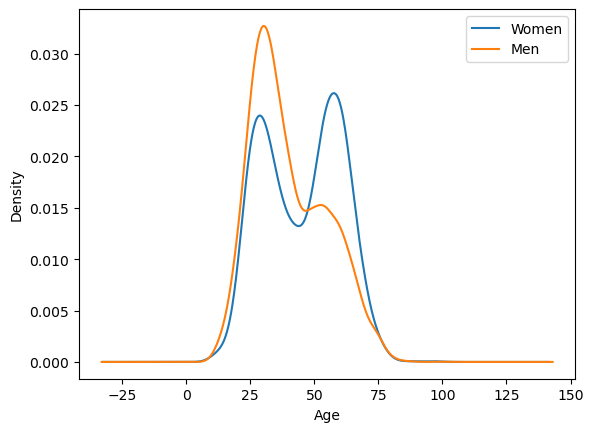

In [4]:
df_dupr[[(x < 100) and (x>10) for x in df_dupr.age]].loc[pd.notna(df_dupr.gender)].pivot(columns="gender",values=["age"]).plot.kde()
plt.legend(["Women","Men"])
plt.xlabel("Age")

In [5]:
dm=df_dupr[df_dupr.gender == "M"].doubles_dupr
dF=df_dupr[df_dupr.gender == "F"].doubles_dupr
sm=df_dupr[df_dupr.gender == "M"].singles_dupr.astype("float")
sf=df_dupr[df_dupr.gender == "F"].singles_dupr.astype("float")
dms=df_dupr.loc[df_dupr.gender=="M"][lambda x:pd.notna(x.singles_dupr)]["doubles_dupr"]
dfs=df_dupr.loc[df_dupr.gender=="F"][lambda x:pd.notna(x.singles_dupr)]["doubles_dupr"]
da=df_dupr.doubles_dupr
ds=df_dupr.singles_dupr
dds = df_dupr.loc[lambda x:pd.notna(x.singles_dupr)]["doubles_dupr"]

In [15]:
df_raw = pd.DataFrame()
dict_metrx = {}
df_quant = pd.DataFrame()
mlist = [da,ds,dds,dm,dF,sm,sf,dms,dfs]
nlist = ["Doubles","Singles","Doubles w/ Singles","Men Doubles","Women Doubles","Men Singles","Women Singles","Men Doubles w/ Singles","Women Doubles w/ Singles"]
for n,m in zip(nlist,mlist):
    df_raw[n] = m
    dict_metrx[n] = {"mean":m.mean().round(3),"median":m.median().round(3)}
    df_quant[n] = m.quantile([.01*x for x in range(0,101)],interpolation="nearest")
df_metrx=pd.DataFrame(dict_metrx.values())
df_metrx["metric"]=dict_metrx.keys()
df_quant.reset_index(drop=False,inplace=True,names="pctile")

In [19]:
df_metrx = df_metrx[["metric","mean","median"]]
df_metrx.to_csv("../docs/dupr_stats.csv")
df_metrx

,metric,mean,median
0,Doubles,3.460,3.440
1,Singles,3.775,3.640
2,Doubles w/ Singles,3.875,3.820
3,Men Doubles,3.566,3.540
4,Women Doubles,3.253,3.250
5,Men Singles,3.797,3.660
6,Women Singles,3.680,3.555
7,Men Doubles w/ Singles,3.889,3.820
8,Women Doubles w/ Singles,3.817,3.800


In [18]:
df_quant.to_csv("../docs/dupr_percentiles.csv")

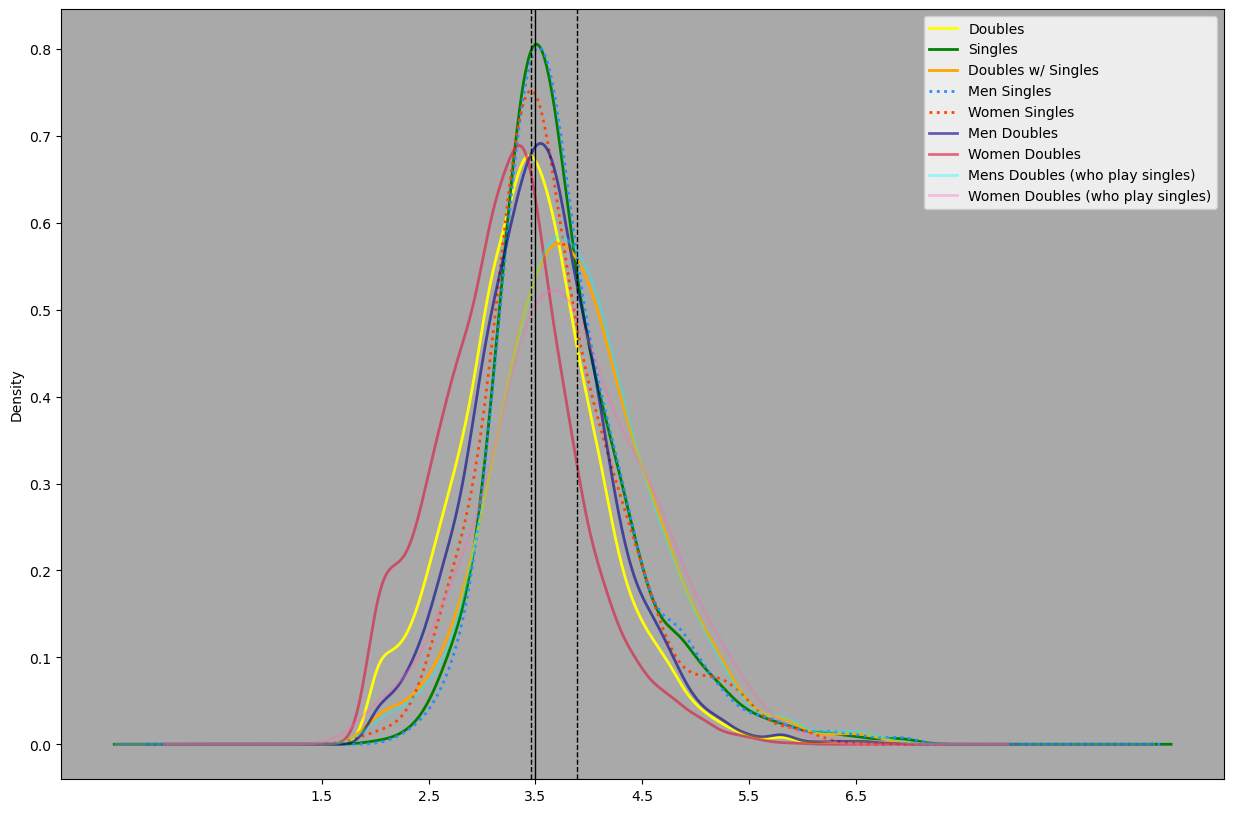

In [9]:
df_raw["Doubles"].plot.kde(color="yellow",linewidth=2,figsize=(15,10))
df_raw["Singles"].plot.kde(color="green",linewidth=2)
df_raw["Doubles w/ Singles"].plot.kde(color="orange",linewidth=2)

df_raw["Men Singles"].plot.kde(color="dodgerblue",linewidth=2,linestyle=":")
df_raw["Women Singles"].plot.kde(color="orangered",linewidth=2,linestyle=":")

df_raw["Men Doubles"].plot.kde(color="darkblue",linewidth=2,alpha=.6)
df_raw["Women Doubles"].plot.kde(color="crimson",linewidth=2,alpha=.6)

df_raw["Men Doubles w/ Singles"].plot.kde(color="cyan",linewidth=2,alpha=.35)
df_raw["Women Doubles w/ Singles"].plot.kde(color="hotpink",linewidth=2,alpha=.35).set_facecolor("darkgrey")

plt.legend(["Doubles","Singles","Doubles w/ Singles", \
            "Men Singles","Women Singles", \
                "Men Doubles","Women Doubles", \
                    "Mens Doubles (who play singles)","Women Doubles (who play singles)"])

plt.xticks([1.5,2.5,3.5,4.5,5.5,6.5])
plt.axvline(x=3.46, color='black',linewidth=1,linestyle="--")
plt.axvline(x=3.5, color='black',linewidth=1)
plt.axvline(x=3.89, color='black',linewidth=1,linestyle="--")
plt.show(block=True)

In [10]:
bdf_raw["Doubles"].plot.kde(color="black",linewidth=3,figsize=(15,10)).set_facecolor("darkgrey")
df_raw["Singles"].plot.kde(color="black",linewidth=1,linestyle="--")
df_raw["Doubles w/ Singles"].plot.kde(color="black",linewidth=2)

df_raw["Men Doubles"].plot.kde(color="blue",linewidth=3)
df_raw["Men Singles"].plot.kde(color="blue",linewidth=1,linestyle="--")
df_raw["Men Doubles w/ Singles"].plot.kde(color="blue",linewidth=1)

df_raw["Women Doubles"].plot.kde(color="red",linewidth=3)
df_raw["Women Singles"].plot.kde(color="red",linewidth=1,linestyle="--")
df_raw["Women Doubles w/ Singles"].plot.kde(color="red",linewidth=1)

plt.legend(["Doubles","Singles","Doubles w/ Singles","Men Doubles","Men Singles","Mens Doubles (who play singles)","Women Doubles","Women Singles","Women Doubles (who play singles)"])
plt.xticks([2,3.2,3.5,3.8,5,6.2])

plt.axvline(x=3.2, color='white',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.5, color='yellow',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.8, color='white',linewidth=1,linestyle=":",alpha=.9)
plt.show(block=True)

NameError: name 'bdf_raw' is not defined

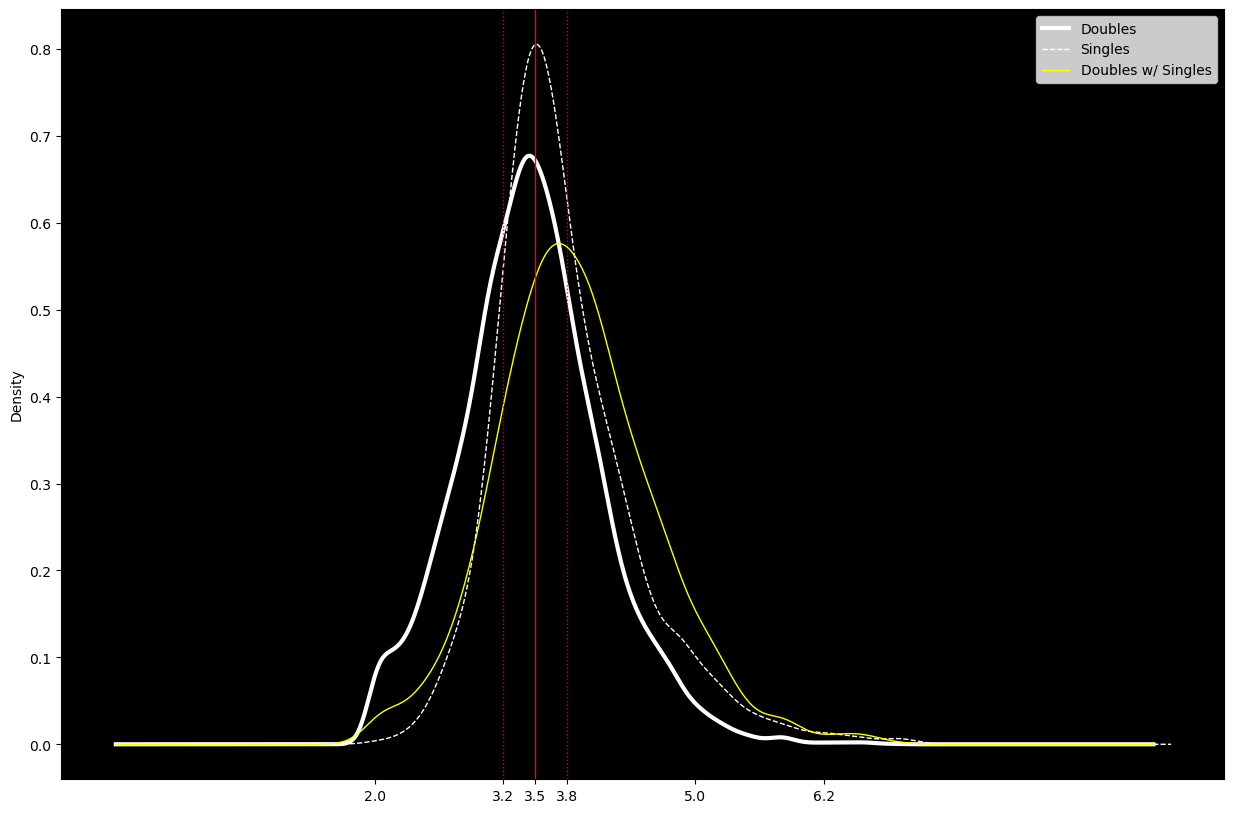

In [65]:
df_raw["Doubles"].plot.kde(color="white",linewidth=3,figsize=(15,10)).set_facecolor("black")
df_raw["Singles"].plot.kde(color="white",linewidth=1,linestyle="--")
df_raw["Doubles w/ Singles"].plot.kde(color="yellow",linewidth=1)

plt.legend(["Doubles","Singles","Doubles w/ Singles"])
plt.xticks([2,3.2,3.5,3.8,5,6.2])

plt.axvline(x=3.2, color='red',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.5, color='red',linewidth=1)
plt.axvline(x=3.8, color='red',linewidth=1,linestyle=":",alpha=.9)
plt.show(block=True)

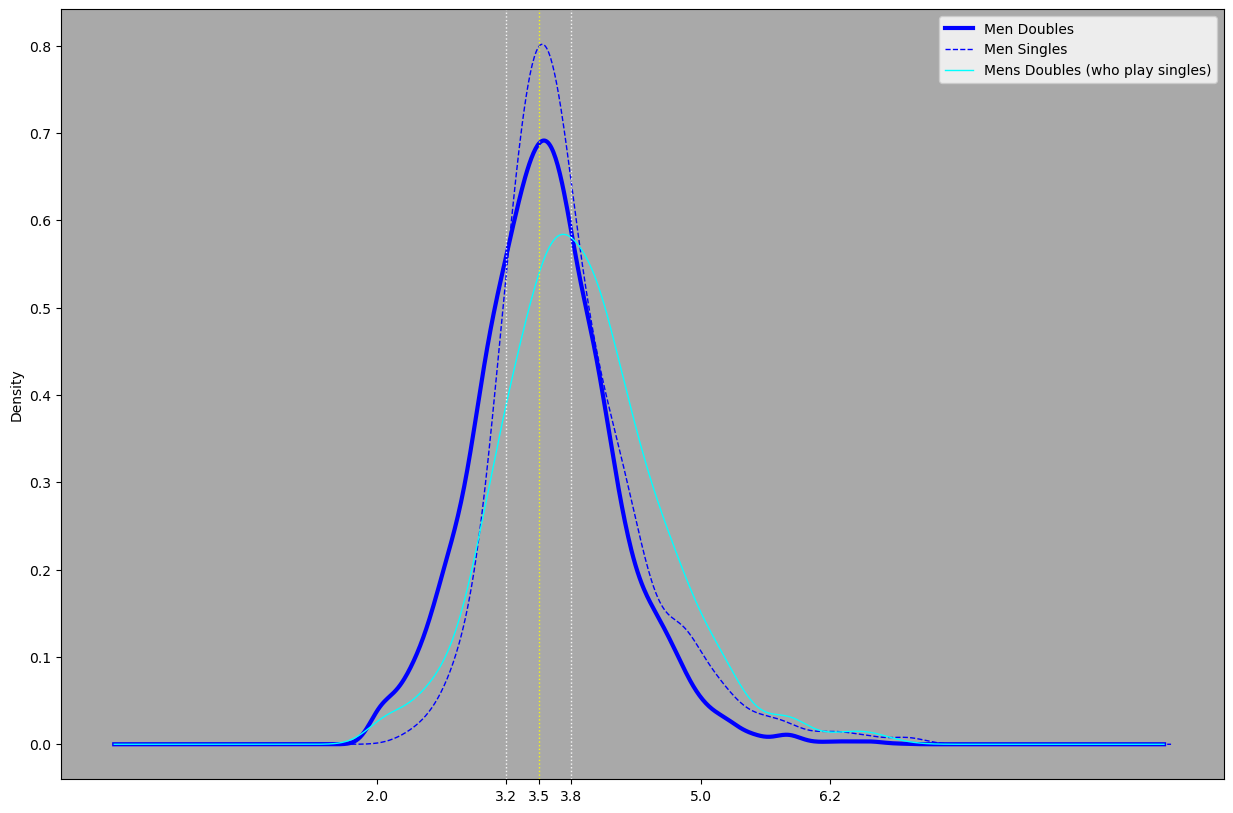

In [64]:

df_raw["Men Doubles"].plot.kde(color="blue",linewidth=3,figsize=(15,10)).set_facecolor("darkgrey")
df_raw["Men Singles"].plot.kde(color="blue",linewidth=1,linestyle="--")
df_raw["Men Doubles w/ Singles"].plot.kde(color="cyan",linewidth=1)


plt.legend(["Men Doubles","Men Singles","Mens Doubles (who play singles)"])
plt.xticks([2,3.2,3.5,3.8,5,6.2])

plt.axvline(x=3.2, color='white',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.5, color='yellow',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.8, color='white',linewidth=1,linestyle=":",alpha=.9)
plt.show(block=True)

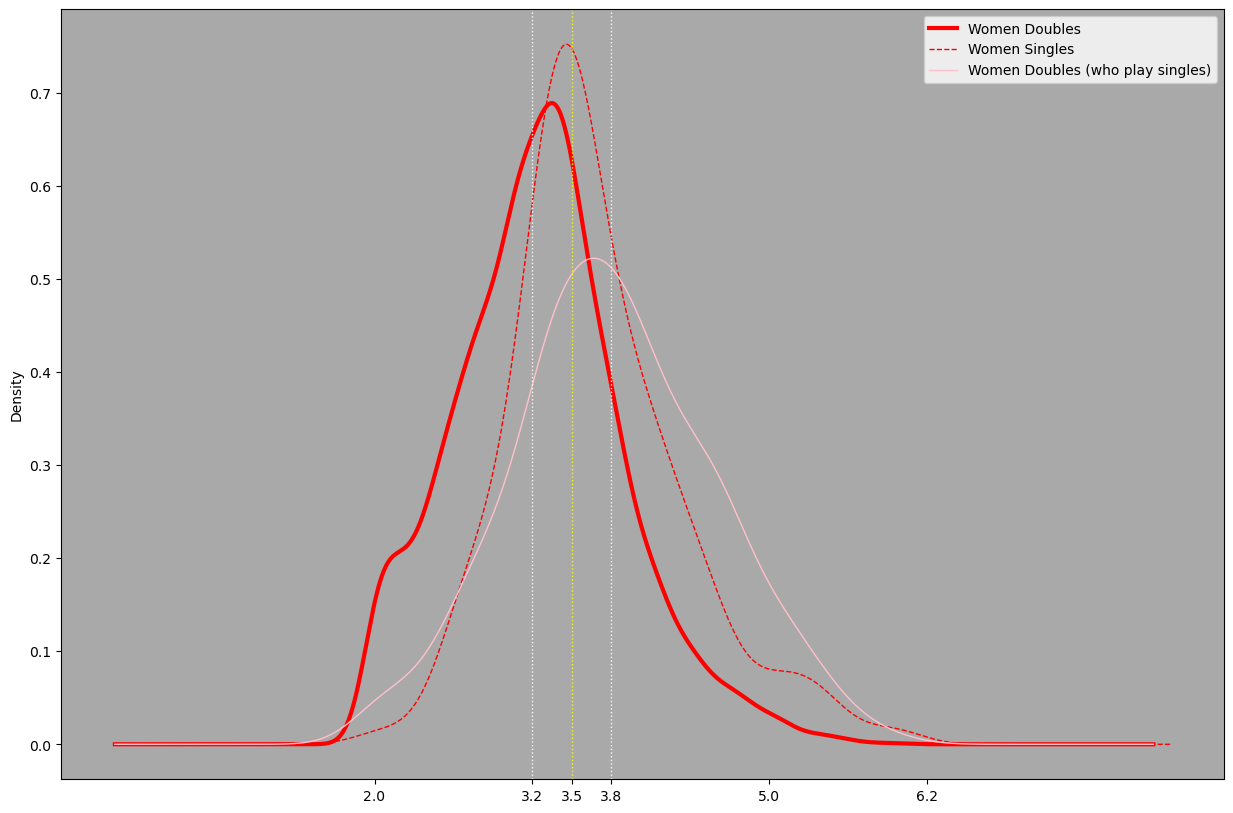

In [63]:
df_raw["Women Doubles"].plot.kde(color="red",linewidth=3,figsize=(15,10)).set_facecolor("darkgrey")
df_raw["Women Singles"].plot.kde(color="red",linewidth=1,linestyle="--")
df_raw["Women Doubles w/ Singles"].plot.kde(color="pink",linewidth=1)

plt.legend(["Women Doubles","Women Singles","Women Doubles (who play singles)"])
plt.xticks([2,3.2,3.5,3.8,5,6.2])

plt.axvline(x=3.2, color='white',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.5, color='yellow',linewidth=1,linestyle=":",alpha=.9)
plt.axvline(x=3.8, color='white',linewidth=1,linestyle=":",alpha=.9)
plt.show(block=True)